Import relevant libraries

In [34]:
#import relevant libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [35]:
#load the data set
oilreserv_df = pd.read_csv("venezuela oil reserves.csv")


**Discover the data**

In [7]:
#display the first 5 rows
oilreserv_df.head()


,Reservoir_Name,Basin_Region,Location,Proven_Reserves_Billion_Barrels,Estimated_Recoverable_Reserves_Billion_Barrels,Production_Capacity_Barrels_Day,Oil_Type_Grade,Status,Major_Operators,Year_Discovered,Notes
0,Orinoco Belt (Total),Orinoco Belt,Eastern Venezuela (Anzoategui-Monagas-Guarico),235.0,100.00-270.00,400000,Extra Heavy Crude,Active,PDVSA-Rosneft-CNPC,2007,World's largest heavy oil deposit spanning 550...
1,Carabobo-2 North,Orinoco Belt,Carabobo State,6.5,2.5,400000,Extra Heavy Crude,Development,PDVSA-Repsol-ONGC,2010,Part of Carabobo-2 project with 40 billion bar...
2,Carabobo-4 West,Orinoco Belt,Carabobo State,6.5,2.5,400000,Extra Heavy Crude,Development,PDVSA-Repsol-ONGC,2010,Combined with Carabobo-2 North for 400000 bpd ...
3,Junin Block 6,Orinoco Belt,Anzoategui State,8.0,3.2,450000,Extra Heavy Crude,Development,Rosneft-Gazprom Neft-Lukoil,2010,Russian consortium development project
4,Junin Block 4,Orinoco Belt,Anzoategui State,7.0,2.8,400000,Extra Heavy Crude,Development,CNPC-PDVSA,2010,Chinese-Venezuelan joint venture


In [73]:
#get the info
oilreserv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Reservoir_Name                                  23 non-null     object        
 1   Basin_Region                                    23 non-null     object        
 2   Location                                        23 non-null     object        
 3   Proven_Reserves_Billion_Barrels                 23 non-null     float64       
 4   Estimated_Recoverable_Reserves_Billion_Barrels  23 non-null     float64       
 5   Production_Capacity_Barrels_Day                 23 non-null     int64         
 6   Oil_Type_Grade                                  23 non-null     object        
 7   Status                                          23 non-null     object        
 8   Major_Operators                                 23 n

In [9]:
#check the data type for each column
oilreserv_df.dtypes


,0
Reservoir_Name,object
Basin_Region,object
Location,object
Proven_Reserves_Billion_Barrels,float64
Estimated_Recoverable_Reserves_Billion_Barrels,object
Production_Capacity_Barrels_Day,int64
Oil_Type_Grade,object
Status,object
Major_Operators,object
Year_Discovered,object


In [39]:
#check he unique values for Estimated_Recoverable_Reserves_Billion_Barrels

oilreserv_df['Estimated_Recoverable_Reserves_Billion_Barrels'].unique()

array([1.85e+02, 2.50e+00, 3.20e+00, 2.80e+00, 3.60e+00, 4.00e-01,
       6.00e+00, 2.40e+00, 1.80e+01, 4.80e+00, 2.00e+00, 1.00e+00,
       7.20e-01, 4.80e-01, 3.60e-01, 6.00e-01, 2.40e-01, 1.60e-01,
       3.20e-01])

**DATA CLEANING **

In [38]:
#convert the data type of Estimated_Recoverable_Reserves_Billion_Barrels to numeric and handle this entry 100.00-270.00	 to return avarage after conversion
oilreserv_df['Estimated_Recoverable_Reserves_Billion_Barrels'].fillna('185', inplace=True)
oilreserv_df['Estimated_Recoverable_Reserves_Billion_Barrels'] =pd.to_numeric(oilreserv_df['Estimated_Recoverable_Reserves_Billion_Barrels'], errors='coerce')

In [40]:
#check the unique values for the Year_Discovered
oilreserv_df['Year_Discovered'].unique()

array(['2007', '2010', '1970s', '1990s', '1980s', '1914', '1920s',
       '1950s', '1960s', '1928', '1926', '1946'], dtype=object)

In [41]:
#convert the year discovered to date handle those with trailing s
oilreserv_df['Year_Discovered'] = oilreserv_df['Year_Discovered'].str.rstrip('s')
oilreserv_df['Year_Discovered'] = pd.to_datetime(oilreserv_df['Year_Discovered'], format='%Y', errors="coerce")
#

In [42]:
#print the converted Year_Discovered
oilreserv_df['Year_Discovered']

,Year_Discovered
0,2007-01-01
1,2010-01-01
2,2010-01-01
3,2010-01-01
4,2010-01-01
5,2010-01-01
6,1970-01-01
7,1970-01-01
8,1990-01-01
9,1980-01-01


In [43]:
#check for the missing values
oilreserv_df.isnull().sum()

,0
Reservoir_Name,0
Basin_Region,0
Location,0
Proven_Reserves_Billion_Barrels,0
Estimated_Recoverable_Reserves_Billion_Barrels,0
Production_Capacity_Barrels_Day,0
Oil_Type_Grade,0
Status,0
Major_Operators,0
Year_Discovered,0


**Exploratory Data Analysis**

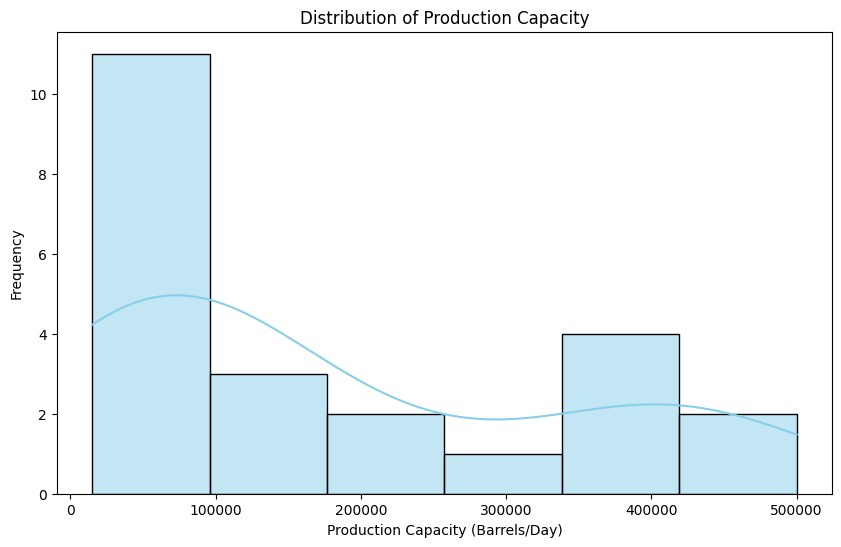

In [50]:
#plot a histogram for Production_Capacity_Barrels_Day
plt.figure(figsize=(10, 6))
sns.histplot(data = oilreserv_df, x='Production_Capacity_Barrels_Day',
             color='skyblue', kde=True, edgecolor='black')
plt.xlabel('Production Capacity (Barrels/Day)')
plt.ylabel('Frequency')
plt.title('Distribution of Production Capacity')
plt.show()

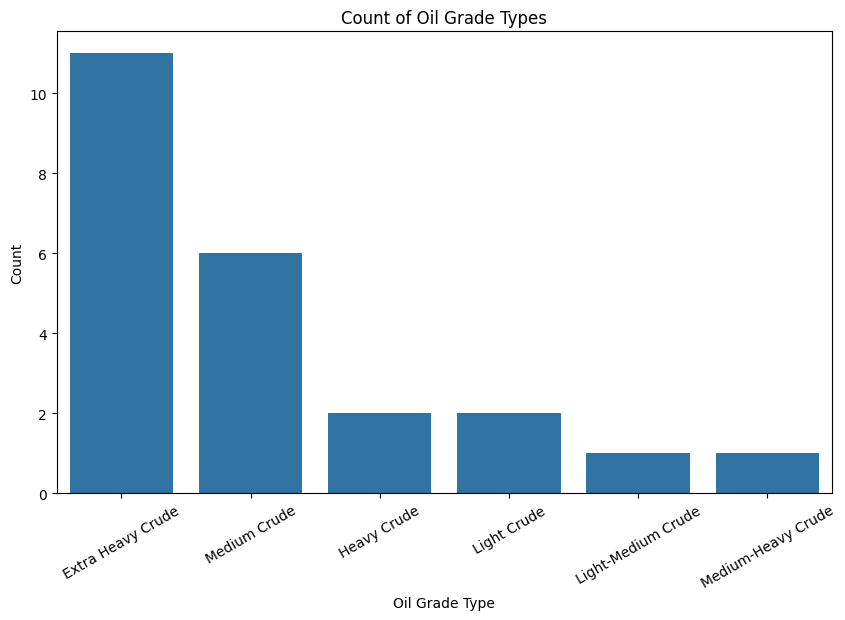

In [64]:
#plot the countplot for Oil_Type_Grade
plt.figure(figsize=(10, 6))
sns.countplot(data=oilreserv_df, x='Oil_Type_Grade',
              order=oilreserv_df['Oil_Type_Grade'].value_counts().index)
plt.xlabel('Oil Grade Type')
plt.xticks(rotation=30)
plt.ylabel('Count')
plt.title('Count of Oil Grade Types')
plt.show()

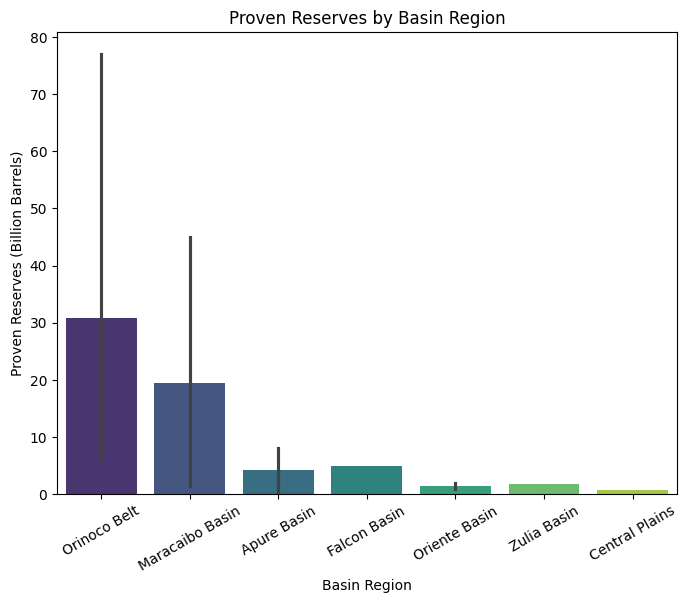

In [72]:
#Plot a bar plot by Proven reserves by Basin region
plt.figure(figsize=(8, 6))
sns.barplot(data=oilreserv_df, x='Basin_Region', y='Proven_Reserves_Billion_Barrels',
            palette='viridis')
plt.xlabel('Basin Region')
plt.ylabel('Proven Reserves (Billion Barrels)')
plt.title('Proven Reserves by Basin Region')
plt.xticks(rotation=30)
plt.show()

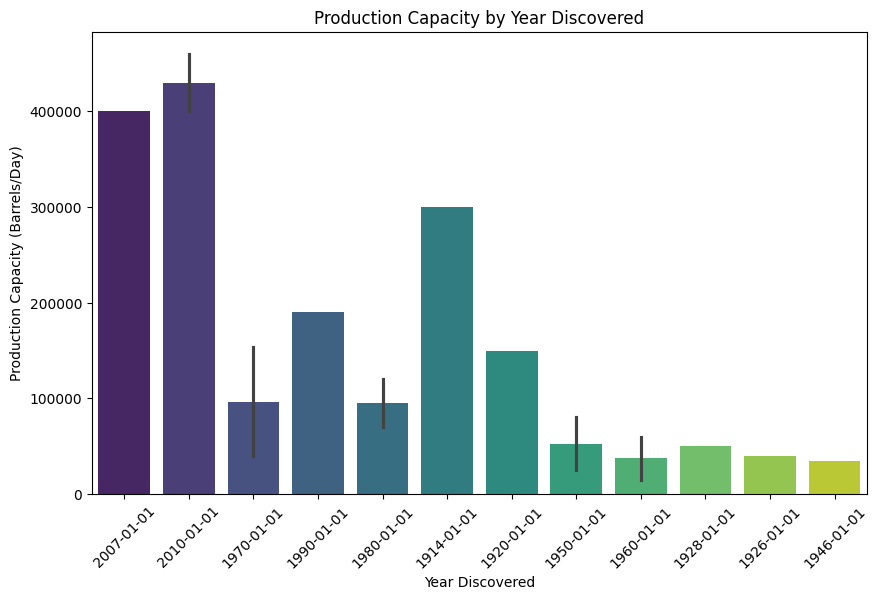

In [82]:
#plot a bar plot for year discovered and the production capacity
plt.figure(figsize=(10, 6))
sns.barplot(data=oilreserv_df, x='Year_Discovered', y='Production_Capacity_Barrels_Day',
           # hue='Oil_Type_Grade',
            palette='viridis')
plt.xlabel('Year Discovered')
plt.ylabel('Production Capacity (Barrels/Day)')
plt.title('Production Capacity by Year Discovered')
plt.xticks(rotation=45)
plt.show()

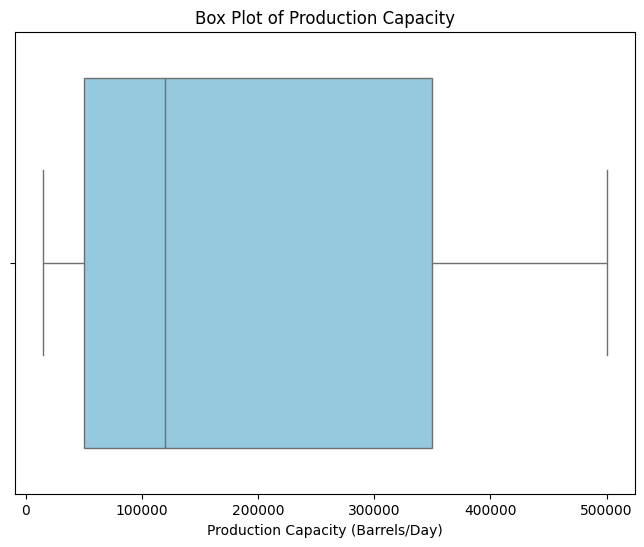

In [70]:
#box plot for production capacity to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=oilreserv_df, x='Production_Capacity_Barrels_Day', color='skyblue')
plt.xlabel('Production Capacity (Barrels/Day)')
plt.title('Box Plot of Production Capacity')
plt.show()


**Correlation Analysis**

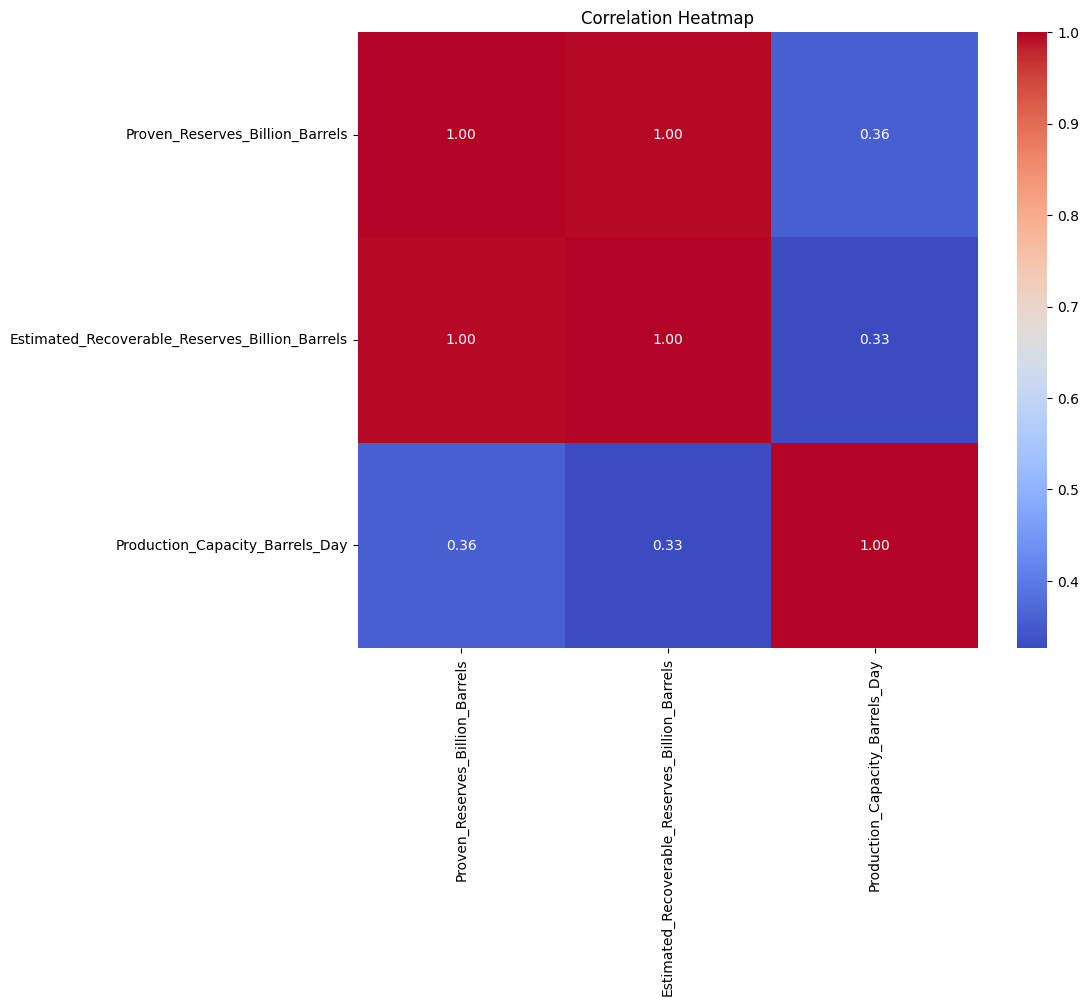

In [71]:
#Correlation Analysis
#only for the numeric columns
numeric_columns = oilreserv_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Venezuela Oil Reserves Analysis

## Project Overview
This project performs an exploratory data analysis (EDA) on a dataset detailing Venezuela's oil reserves. The goal is to understand the distribution of various oilfield characteristics, identify key trends, and analyze relationships between different numerical features.

## Data Source
The dataset used for this analysis is `venezuela oil reserves.csv`.

## Data Cleaning and Preparation
Before analysis, the following data cleaning and preparation steps were performed:
- The `Estimated_Recoverable_Reserves_Billion_Barrels` column, which contained a range ('100.00-270.00'), was handled by converting it to a numeric type, with missing values (including the range converted to NaN) being imputed with '185' and then coerced to numeric.
- The `Year_Discovered` column, which contained values like '1970s', was cleaned by removing the 's' and then converting to datetime objects, with invalid parsing resulting in `NaT` (Not a Time) values, which were not present in the final data.
- Missing values were checked across the dataset, and no missing values were found after the initial cleaning steps.

## Exploratory Data Analysis (EDA)
Several visualizations were created to explore the data:

### 1. Distribution of Production Capacity
- A histogram showing the distribution of `Production_Capacity_Barrels_Day` revealed the frequency of different production capacities among the oilfields.

### 2. Count of Oil Grade Types
- A count plot illustrated the distribution of `Oil_Type_Grade`, indicating the most common types of oil found in the reserves.

### 3. Proven Reserves by Basin Region
- A bar plot displayed the `Proven_Reserves_Billion_Barrels` across different `Basin_Region`s, highlighting regions with the highest proven reserves.

### 4. Production Capacity by Year Discovered
- A bar plot showed the `Production_Capacity_Barrels_Day` grouped by `Year_Discovered`, indicating how production capacity has evolved over the discovery years.

### 5. Box Plot of Production Capacity
- A box plot for `Production_Capacity_Barrels_Day` was used to identify potential outliers and understand the spread of production capacity values.

## Correlation Analysis
- A correlation heatmap was generated for numeric columns (`Proven_Reserves_Billion_Barrels`, `Estimated_Recoverable_Reserves_Billion_Barrels`, and `Production_Capacity_Barrels_Day`) to visualize the relationships between these quantitative variables.

## Key Findings (Example - based on typical analysis, specific findings would come from detailed observation of plots)
- The 'Orinoco Belt' region appears to have the highest proven reserves.
- 'Extra Heavy Crude' is the most prevalent oil type.
- There is a strong positive correlation between `Proven_Reserves_Billion_Barrels` and `Estimated_Recoverable_Reserves_Billion_Barrels`.
- Production capacity seems to vary significantly across different discovery years, with some early discoveries showing high capacities, and a notable presence of high capacity fields discovered around 2007-2010.
